In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

import core
import data

TEST_PATH = 'resources/'

In [2]:
def cross_validation(X, Y, ids_batches, boost):
    y_classifier = []
    y_actual = []

    for test_num in range(len(ids_batches)):
        X_train, Y_train = data.train_dataset(X, Y, ids_batches, test_num)
        boost.fit(X_train, Y_train)

        for i in ids_batches[test_num]:
            y_prediction = boost.classify(X[i])
            y_classifier.append(y_prediction)
            y_actual.append(Y[i])

    return accuracy_score(y_actual, y_classifier)

In [9]:
X, Y = data.read_data(TEST_PATH + 'geyser.csv')
ids_batches = data.split_indices_data(len(Y))

for models in range(5, 30):
    print('start for ' + str(models) + ' models')
    boost = core.AdaBoost(models)
    print('  CV result ' + str(cross_validation(X, Y, ids_batches, boost)))
    print()

start for 5 models
  CV result 0.6036036036036037

start for 6 models
  CV result 0.6396396396396397

start for 7 models
  CV result 0.5765765765765766

start for 8 models
  CV result 0.7432432432432432

start for 9 models
  CV result 0.6351351351351351

start for 10 models
  CV result 0.6216216216216216

start for 11 models
  CV result 0.8108108108108109

start for 12 models
  CV result 0.6081081081081081

start for 13 models
  CV result 0.7612612612612613

start for 14 models
  CV result 0.7477477477477478

start for 15 models
  CV result 0.7387387387387387

start for 16 models
  CV result 0.7882882882882883

start for 17 models
  CV result 0.6036036036036037

start for 18 models
  CV result 0.8333333333333334

start for 19 models
  CV result 0.7567567567567568

start for 20 models
  CV result 0.8513513513513513

start for 21 models
  CV result 0.8153153153153153

start for 22 models
  CV result 0.7837837837837838

start for 23 models
  CV result 0.6036036036036037

start for 24 mode

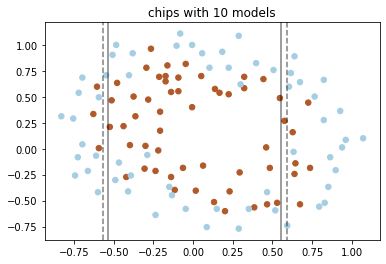

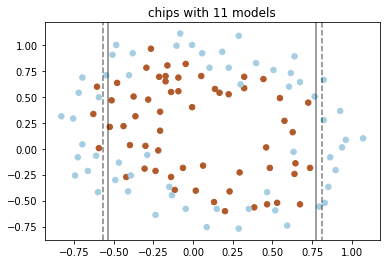

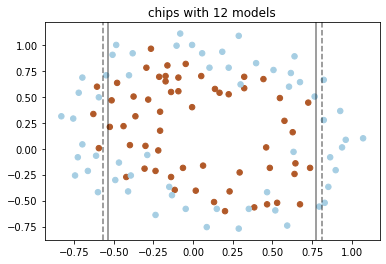

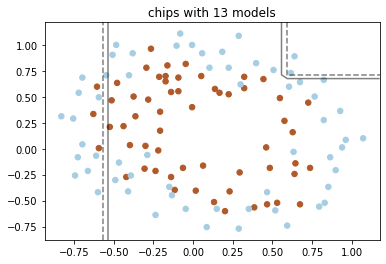

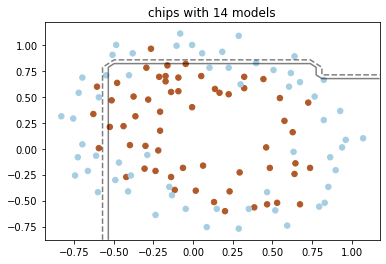

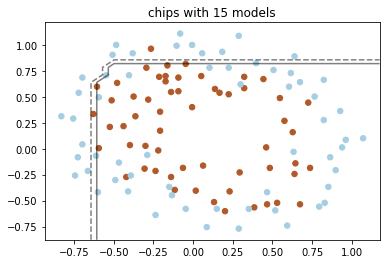

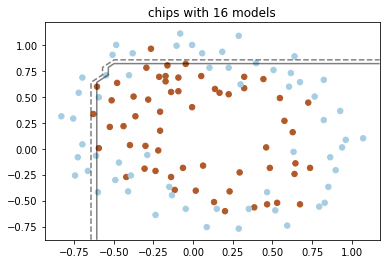

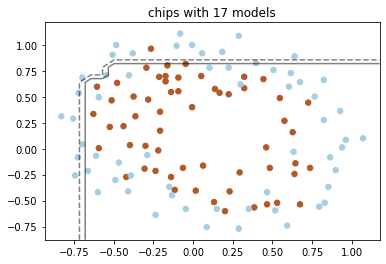

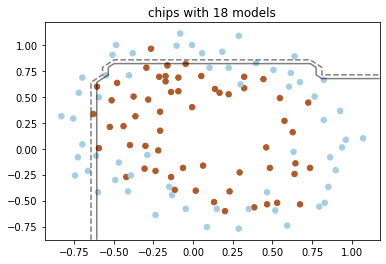

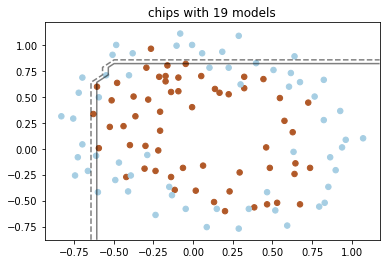

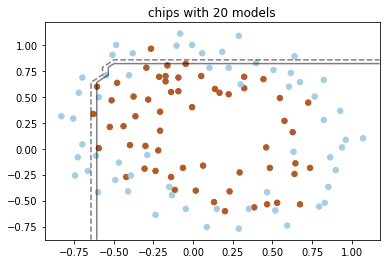

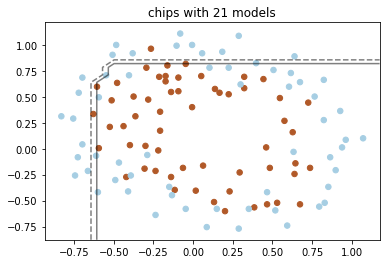

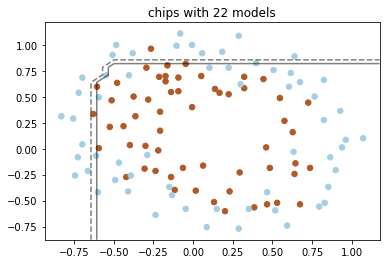

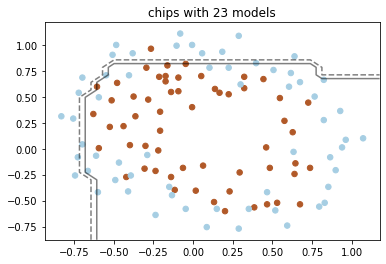

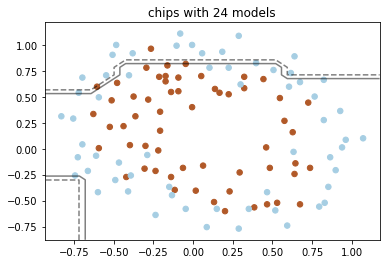

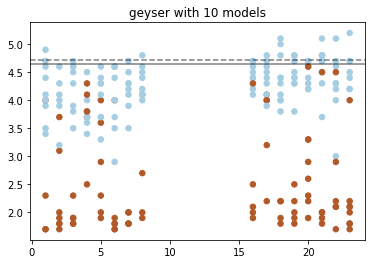

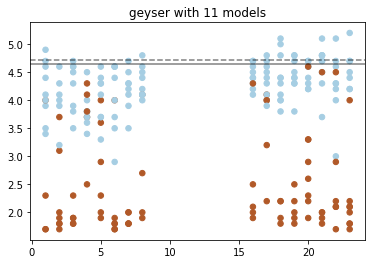

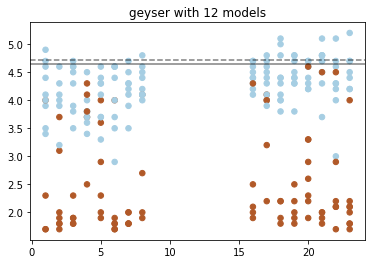

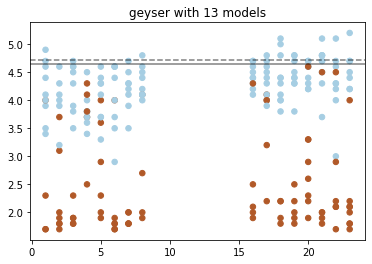

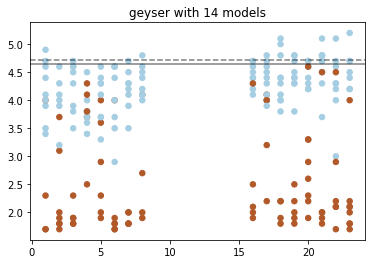

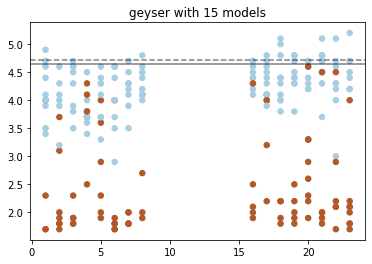

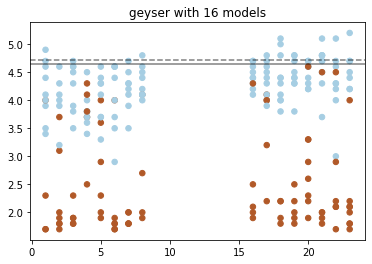

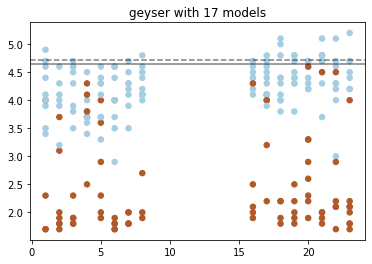

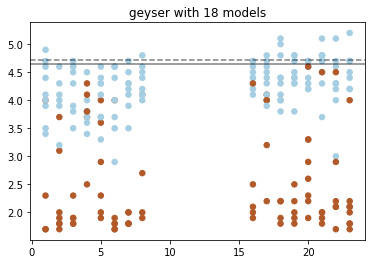

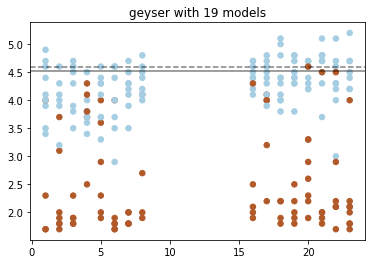

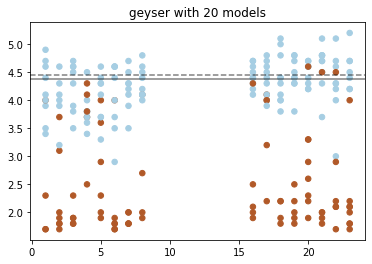

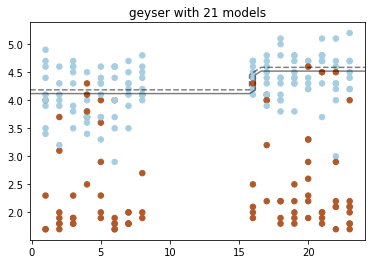

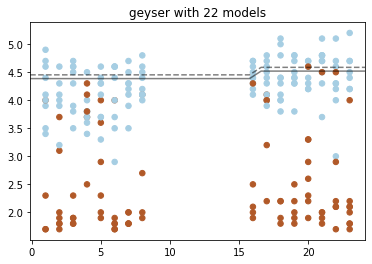

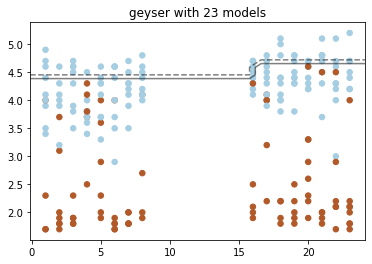

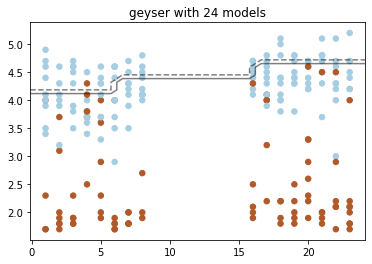

In [7]:
def plot_decision(X, y, boost, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = boost.predict(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    plt.title(title)
    plt.show()

start_models = 10
for path in ['chips', 'geyser']:
    X, Y = data.read_data(TEST_PATH + path + '.csv')

    boost = core.AdaBoost(start_models)
    boost.fit(X, Y)
    for i in range(15):
        plot_decision(X, Y, boost, path + " with " + str(start_models + i) + " models")
        boost.next_model()